# Support Vector Machine (SVM)

SVM은 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델.  
SVM은 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합함.  

## 1. 선형 SVM 분류
SVM 분류기를 라지 마진 분류(large margin classification)라고 함.  
도로 경계에 위치한 샘플에 의해 전적으로 결정됨. 이런 샘플을 **서포트 벡터**라고 한다.  

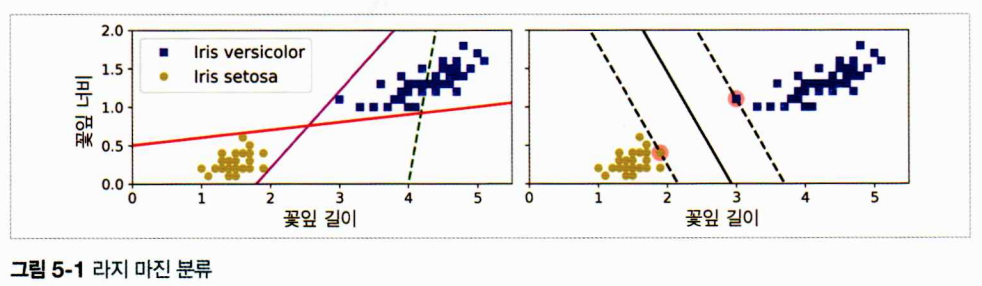

> SVM은 feature의 스케일에 민감하다. feature의 스케일을 조정하면 결정 경계가 훨씬 좋아진다.

**하드 마진 분류(Hard margin classification)** 에는 두 가지 문제점이 있다.  
1. 데이터가 선형적으로 구분될 수 있어야 제대로 작동  
2. 이상치에 민감  
이런 문제를 피하려면 좀 더 유연한 모델이 필요하다. 도로의 폭을 가능한 넓게 유지하는 것과 마진 오류(margin violation) 사이에 적절한 균형을 잡아야함.  
-> **소프트 마진 분류 (Soft margin classification)**

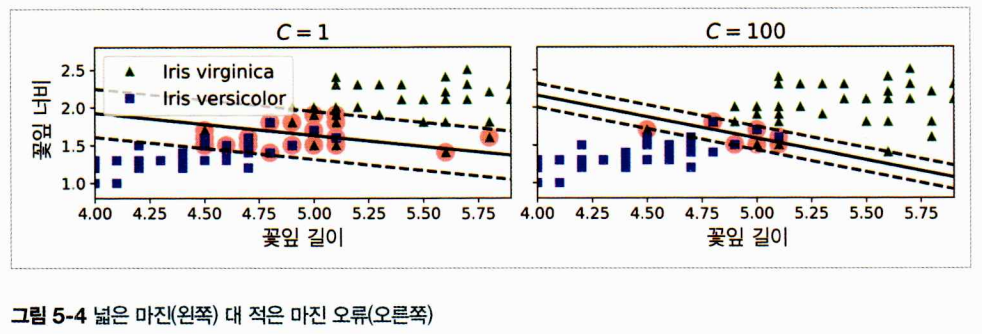
  
SVM 모델이 과대적합이라면 C를 감소시켜 모델을 규제할 수 있다.

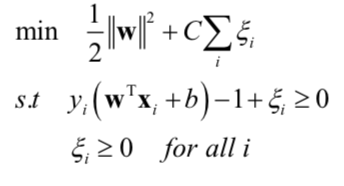

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"]==2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("linear_svc",LinearSVC(C=1, loss="hinge")),
                   ])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5,1.7]])

array([1.])

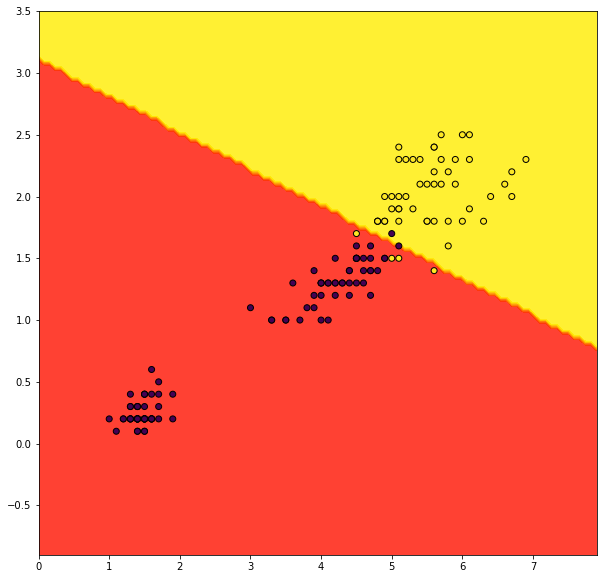

In [4]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize = (10,10))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    svm_clf,X,response_method = "predict",
    cmap= plt.cm.autumn,
    #plot_method = "contour",
    alpha=0.8,
    ax=ax,
)
disp.ax_.scatter(X[:,0],X[:,1], c = y, edgecolor="k")
plt.show()

> SVM 분류기는 로지스틱 회귀 분류기와는 다르게 클래스에 대한 확률을 제공하지 않음.

## 2. 비선형 SVM 분류

선형 SVM 분류기가 효율적이고 많은 경우에 아주 잘 작동하지만, 선형적으로 분류할 수 없는 데이터셋이 많다.  
비선형 데이터셋을 다루는 한 자기 방법은 다항 특성과 같은 특성을 더 추가하는 것.  
이렇게 하면 선형적으로 구분되는 데이터셋이 만들어질 수 있다.  

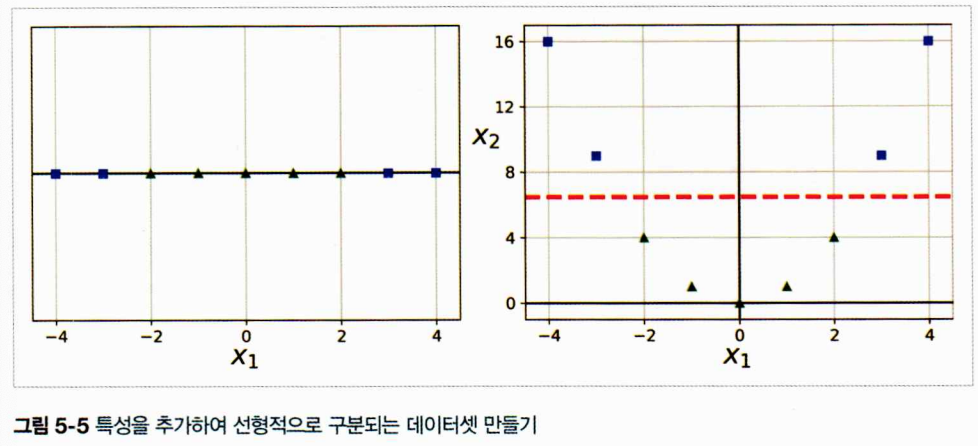

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

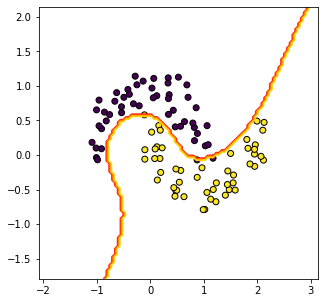

In [6]:
plt.figure(figsize = (5,5))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    polynomial_svm_clf,X,response_method = "predict",
    cmap= plt.cm.autumn,
    plot_method = "contour",
    alpha=0.8,
    ax=ax,
)
disp.ax_.scatter(X[:,0],X[:,1], c = y, edgecolor="k")
plt.show()

## kernel Trick
커널 트릭은 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다.
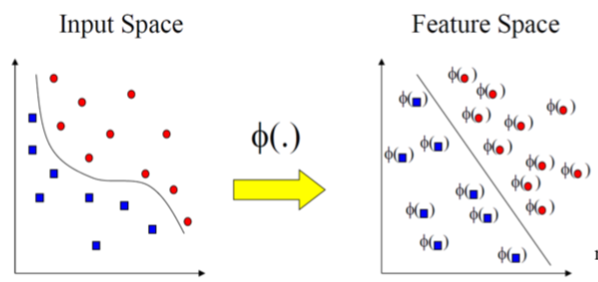  

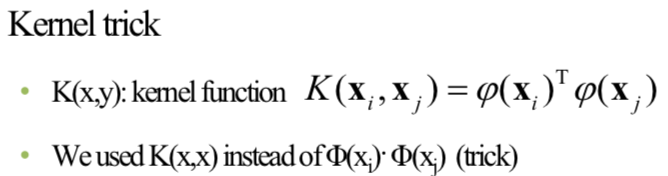  
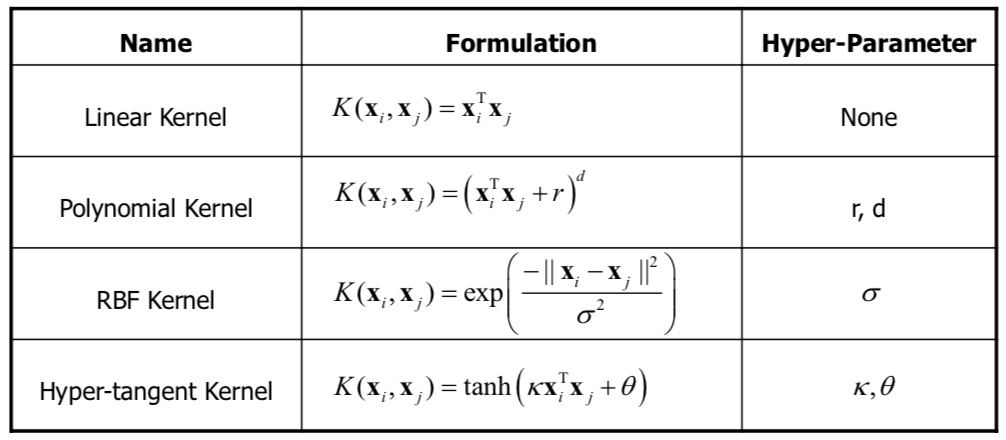

In [7]:
from sklearn.svm import SVC
poly_kernel_svm_clf1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree = 3, coef0=1, C=5))
])
poly_kernel_svm_clf1.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

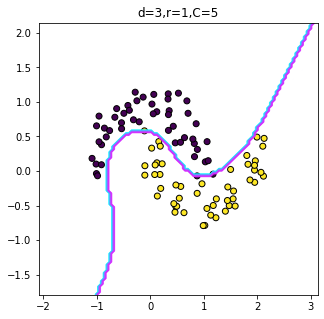

In [8]:
plt.figure(figsize = (5,5))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    poly_kernel_svm_clf1,X,response_method = "predict",
    cmap= plt.cm.cool,
    plot_method = "contour",
    alpha=0.8,
    ax=ax,
)
disp.ax_.scatter(X[:,0],X[:,1], c = y, edgecolor="k")
plt.title("d=3,r=1,C=5")
plt.show()

In [9]:
poly_kernel_svm_clf2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree = 10, coef0=100, C=5))
])
poly_kernel_svm_clf2.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

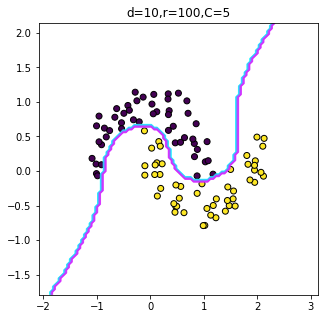

In [10]:
plt.figure(figsize = (5,5))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    poly_kernel_svm_clf2,X,response_method = "predict",
    cmap= plt.cm.cool,
    plot_method = "contour",
    alpha=0.8,
    ax=ax,
)
disp.ax_.scatter(X[:,0],X[:,1], c = y, edgecolor="k")
plt.title("d=10,r=100,C=5")
plt.show()

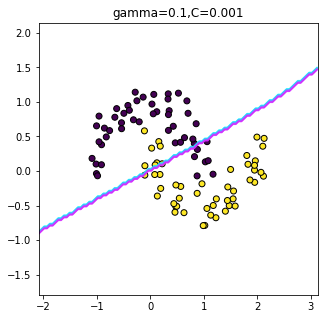

In [13]:
rbf_kernel_svm_clf1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])
rbf_kernel_svm_clf1.fit(X,y)

plt.figure(figsize = (5,5))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    rbf_kernel_svm_clf1,X,response_method = "predict",
    cmap= plt.cm.cool,
    plot_method = "contour",
    alpha=0.8,
    ax=ax,
)
disp.ax_.scatter(X[:,0],X[:,1], c = y, edgecolor="k")
plt.title("gamma=0.1,C=0.001")
plt.show()

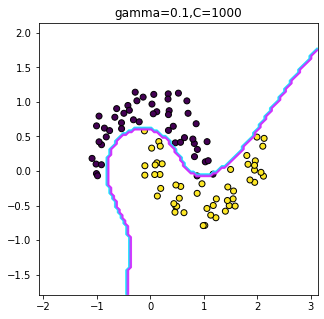

In [15]:
rbf_kernel_svm_clf2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
])
rbf_kernel_svm_clf2.fit(X,y)

plt.figure(figsize = (5,5))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    rbf_kernel_svm_clf2,X,response_method = "predict",
    cmap= plt.cm.cool,
    plot_method = "contour",
    alpha=0.8,
    ax=ax,
)
disp.ax_.scatter(X[:,0],X[:,1], c = y, edgecolor="k")
plt.title("gamma=0.1,C=1000")
plt.show()

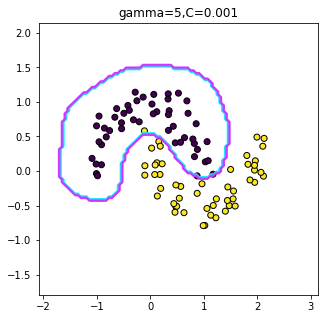

In [18]:
rbf_kernel_svm_clf3 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf3.fit(X,y)

plt.figure(figsize = (5,5))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    rbf_kernel_svm_clf3,X,response_method = "predict",
    cmap= plt.cm.cool,
    plot_method = "contour",
    alpha=0.8,
    ax=ax,
)
disp.ax_.scatter(X[:,0],X[:,1], c = y, edgecolor="k")
plt.title("gamma=5,C=0.001")
plt.show()

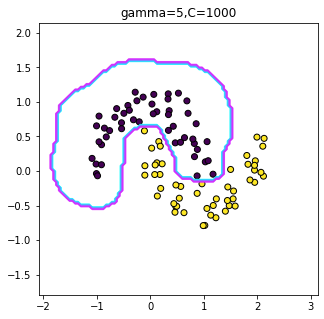

In [19]:
rbf_kernel_svm_clf4 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])
rbf_kernel_svm_clf4.fit(X,y)

plt.figure(figsize = (5,5))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    rbf_kernel_svm_clf4,X,response_method = "predict",
    cmap= plt.cm.cool,
    plot_method = "contour",
    alpha=0.8,
    ax=ax,
)
disp.ax_.scatter(X[:,0],X[:,1], c = y, edgecolor="k")
plt.title("gamma=5,C=1000")
plt.show()

## cf.

In [20]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

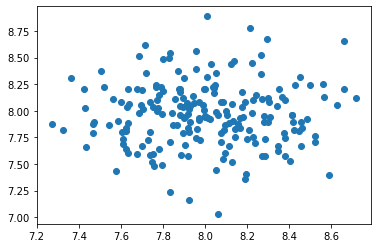

In [22]:
random.seed(123)
x,_ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(8,8))
plt.scatter(x[:,0],x[:,1])
plt.show()

In [23]:
svm = OneClassSVM(kernel='rbf', gamma=0.1,nu=0.03)
svm.fit(x)
pred = svm.predict(x)
print(svm)

OneClassSVM(gamma=0.1, nu=0.03)


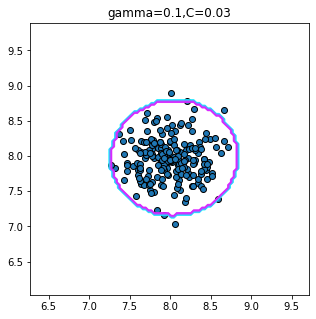

In [27]:
plt.figure(figsize = (5,5))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    svm,x,response_method = "predict",
    cmap= plt.cm.cool,
    plot_method = "contour",
    alpha=0.8,
    ax=ax,
)
disp.ax_.scatter(x[:,0],x[:,1], edgecolor="k")
plt.title("gamma=0.1,C=0.03")
plt.show()

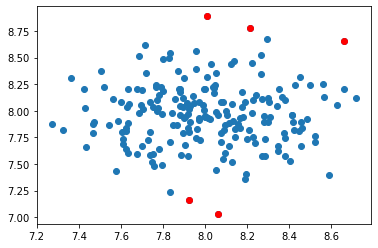

In [24]:
anom_index = where(pred==-1)
values = x[anom_index]
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()